# Principal Components Analysis

This notebook provides a breif summary of Principal Compoents Analysis (PCA) and the `jive.PCA.PCA` object contained in this package. PCA notation is a bit of the wild west so this notebook serves to explain the notation used in this package. Finally, the output of AJIVE consists of a number of different PCAs and the `jive.AJIVE.AJIVE` object makes use of the `jive.PCA.PCA` object.


Let $X \in \mathbb{R}^{n \times d}$ be the provided data matrix with n observations (rows) and d features (columns). Rank $K$ ($1 \le K \le \min(n, d)$) PCA computes the rank $K$ Singular Value Decomposition (SVD) of $X_{cent}$ where $X_{cent}$ is the column centered version of $X$.

## output
The output of rank K PCA is a set of three matrix: scores, singular values and loadings. We refer to these as $U, D, V$ and sort compoents by decreasing singular value.

- scores: $U \in \mathbb{R}^{n \times K}$ with orthonormal columns (also called "normalized scores")
- singular values: $D \in \mathbb{R}^{K \times K}$ digonal matix of singular values. 
- loadings: $V \in \mathbb{R}^{d \times K}$ with orthonormal columns.

We also make use of the "unnormalized scores" $UD \in \mathbb{R}^{n \times K}$ where each scores component has been scaled by the respective singular values.

Note $ X_{cent} = X  - 1_n m^T$ where $1_n \in \mathbb{R}^n$ is the vector of ones and $m \in \mathbb{R}^d$ is the column means of X. The following relationship holds
$$X = X_{cent} + 1_n m^T \approx U D V^T$$
where the $\approx$ is an equality iff $K = rank(X_{cent})$.

The kth loading component, V[:, k] $\in \mathbb{R}^d$ is a direction in variable space. The kth scores component $U[:, k] \in \mathbb{R}^n$ gives a coordinate for each observation in the affine PCA space.

# Notes

####  Zero indexing in the code
*Warning*: To match Python's zero indexing, we will zero index components in the code below (e.g. `pca.scores_[:, 0]` is the first scores component).

#### Centering
In standard PCA the columns are centered with the mean. Depending on the context, other forms of centering may be used e.g. a robust mean or no centering at all (i.e. SVD). PCA will mean center by default, but the user can provide other centering options.

Other data transformations may be used (e.g. whitening), however, these must be handled outside the PCA object. 

#### Sparsity 
The `PCA` object **is able to** handle sparse matrices. If $X$ is a sparse matrix then the naive centering operation will lead to a dense matrix (thus we lose the computational and memory benefits of specialized sparse data structures and algorithms). However, by exploiting lazy evaluation the `jive.lazymatpy` package is able to efficiently compute a low rank SVD of a mean centered sparse matrix **without** creating an intermediate dense matrix.

## References

Some useful PCA/SVD references include

- Notes on SVD from V. Guruswami's course at CMU are a good overview of SVD [link](https://www.cs.cmu.edu/~venkatg/teaching/CStheory-infoage/book-chapter-4.pdf).

- Introduction to Statistical Learning with R (chapter 10.2, [pdf link](https://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf)) and other standard introduction to machine learning textbooks all have sections on PCA (Elements of Statistical Learning, Machine Learning a Probabilistic Perspective, and Pattern Recognition and Machine Learning).

- Principal Components Analysis by I.T. Jolliffe is the standard PCA textbook reference [pdf link](https://bit.ly/2jsD5OC).


In [1]:
import numpy as np
from __future__ import print_function 
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
%matplotlib inline

from jive.PCA import PCA

# load toy dataset

In [2]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)  # measurement data matrix
classes = [iris.target_names[iris.target[i]] for i in range(len(iris.target))]  # plant categories

# fit PCA

In [3]:
pca = PCA()
pca.fit(X)

Rank 4 PCA of a (150, 4) matrix

# PCA output

scores, singular values and loadings can be accessed via `pca.QUANTITY()`. 

In [4]:
print('normalized scores', pca.scores().shape)  # U 
print('unnormalized scores',pca.scores(norm=False).shape)  # UD  (Note this is actually a property)
print('singular values scores',pca.svals().shape)  # D (Note the singular values are stored as a list)
print('loadings',pca.loadings().shape)  # V

normalized scores (150, 4)
unnormalized scores (150, 4)
singular values scores (4,)
loadings (4, 4)


The scores, loadings are stored as pd.DataFrame and the singular values are stored as a pd.Series. These quantities can be accessed via `pca.QUANTITY_`.

In [5]:
print('normalized scores', pca.scores_.shape)  # U 
print('singular values scores',pca.svals_.shape)  # D (Note the singular values are stored as a list)
print('loadings', pca.loadings_.shape)  # V

pca.loadings_

normalized scores (150, 4)
singular values scores (4,)
loadings (4, 4)


,comp_0,comp_1,comp_2,comp_3
sepal length (cm),0.361387,-0.656589,0.582030,0.315487
sepal width (cm),-0.084523,-0.730161,-0.597911,-0.319723
petal length (cm),0.856671,0.173373,-0.076236,-0.479839
petal width (cm),0.358289,0.075481,-0.545831,0.753657


#### variable and observation names

For data analysis, it's useful for PCA to have names for each observation and feature. If X is a pandas dataframe, then PCA will use the indices/column names to name each observation/variable respectively. If X is a numpy object, then PCA will name observations/variables using a default scheme.

In [6]:
print('variable names')
print(pca.var_names())
print(pca.loadings().index)
print()
print('observation names')
print(pca.obs_names())
print(pca.scores().index)

variable names
['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)']
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

observation names
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149]
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            140, 141, 142, 143, 144, 145, 146, 147, 148, 149],
           dtyp

PCA quantities can also be returned as pd.DataFrames with the corresponding variable/observation names using `pca.QUANTITY()`

In [7]:
# The indicies of pca.scores()/ pca.unnorm_scores() are the obs_names
pca.scores()
# pca.unnorm_scores()

,comp_0,comp_1,comp_2,comp_3
0,-0.106937,-0.053116,0.008177,0.001201
1,-0.108133,0.029436,0.061653,0.052547
2,-0.115099,0.024105,-0.005244,0.010596
3,-0.109376,0.052934,-0.009245,-0.040103
4,-0.108714,-0.054340,-0.026388,-0.032506
5,-0.090871,-0.123285,-0.049412,-0.012842
6,-0.112372,0.014878,-0.075547,-0.025547
7,-0.104627,-0.027171,0.006409,-0.024037
8,-0.114996,0.096175,-0.006081,-0.014192
9,-0.106484,0.018921,0.057894,-0.029872


In [8]:
# The indicies of pca.loadings() are the var_names
pca.loadings()

,comp_0,comp_1,comp_2,comp_3
sepal length (cm),0.361387,-0.656589,0.582030,0.315487
sepal width (cm),-0.084523,-0.730161,-0.597911,-0.319723
petal length (cm),0.856671,0.173373,-0.076236,-0.479839
petal width (cm),0.358289,0.075481,-0.545831,0.753657


# output visualization

The PCA object comes with a number of visualizations methods which are useful for exploratory analysis.

### scores visualization

- histograms of the scores for a each component (e.g. `plt.hist(pca.scores_[:, k])`)
- scatter plots of pairs of scores (e.g. `plt.scatter(pca.scores_[:, k], pca.scores_[:, j])`)

/Users/iaincarmichael/anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


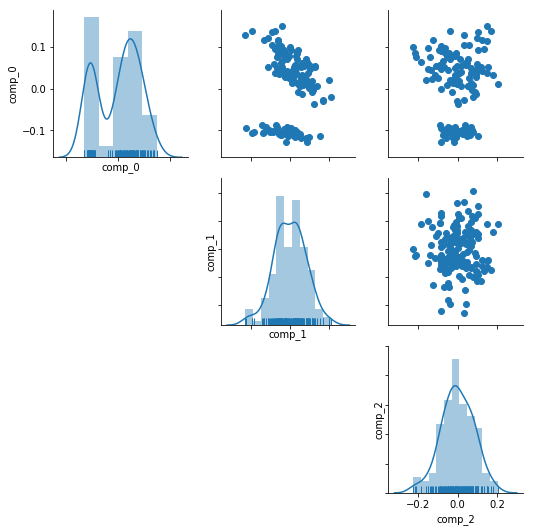

In [9]:
pca.plot_scores()

/Users/iaincarmichael/anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


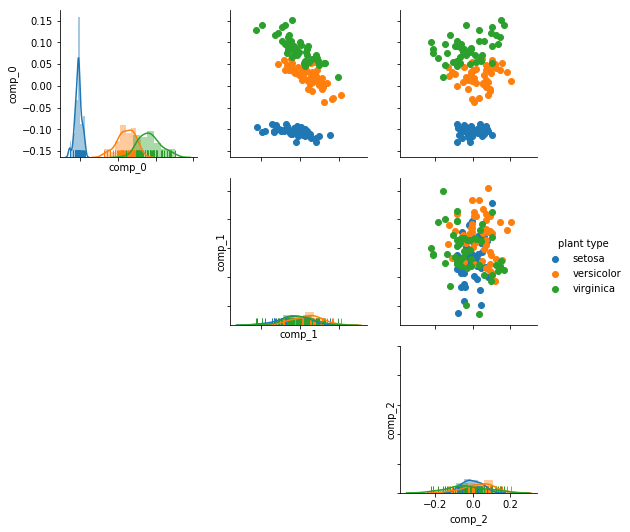

In [10]:
# observations can be colored by known categories
pca.plot_scores(classes=classes, classes_name='plant type')

/Users/iaincarmichael/anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


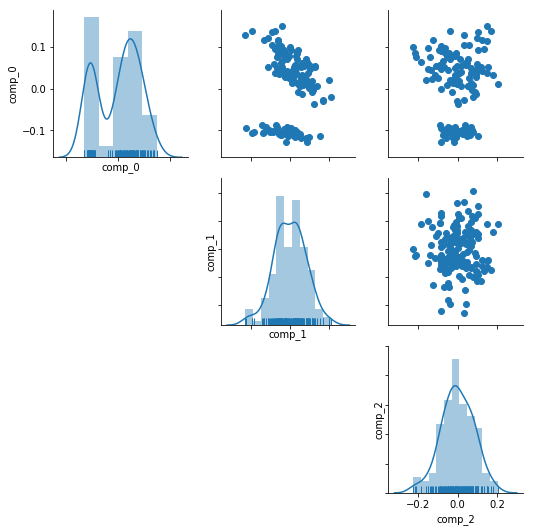

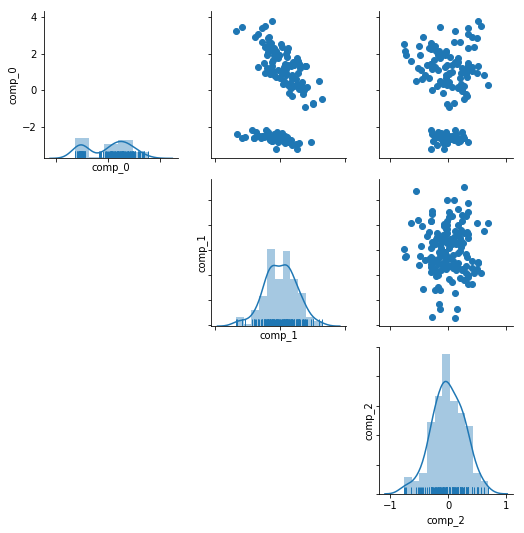

In [11]:
# the normalized scores are shown by default
pca.plot_scores(norm=True)

# can also show the unnormalized scores
plt.figure()
pca.plot_scores(norm=False)

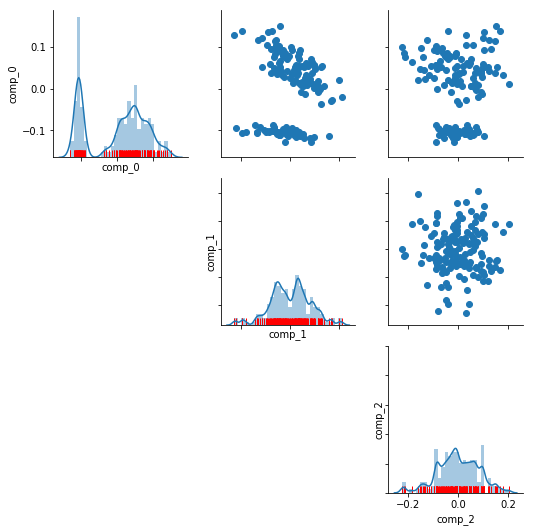

In [12]:
# scores plot can be customized with keyword arguments
pca.plot_scores(dist_kws={'bins': 30,
                          'rug_kws': {'color': 'red'},
                          'kde_kws': {'bw':.01}})

#### loadings visualization

Shows each features's value for a given loading component

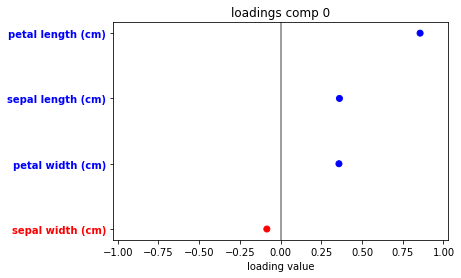

In [13]:
pca.plot_loading(comp=0)

#### singular value visualizations

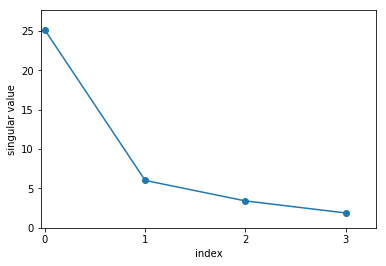

In [14]:
pca.plot_scree()

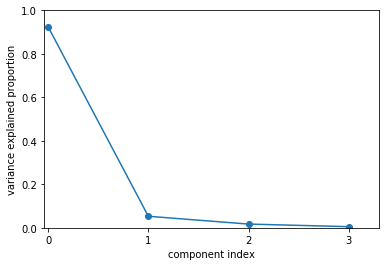

In [15]:
pca.plot_var_expl_prop()

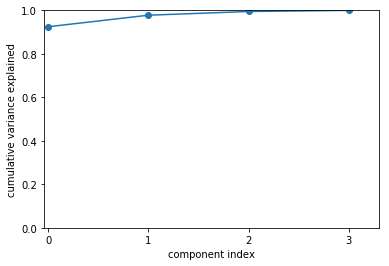

In [16]:
pca.plot_var_expl_cum()

In [17]:
model, saved_selected = pca.plot_interactive_scores_slice(1, 2)

Loading BokehJS ...